# Modelado de Temas/Tópicos
## Por Elizabeth León Guzmán
---



Hasta este punto hemos visto dos tipos de métodos de clustering. Por un lado, métodos como K-means o Affinity propagation en los que cada documento es asignado a un único cluster. Por otro lado, hierarchical clustering, donde cada cluster se compone de otros clusters en una estructura en forma de árbol. 

![cluster_types](http://chdoig.github.io/pytexas2015-topic-modeling/images/clustering-1.png)

Existe una tercer familia de métodos en los que cada documento puede pertenecer a **varios clusters** o verse como una composición de varios tópicos. En esta sesión introduciremos estos temas, abarcando métodos probabilísticos como: *Gaussian Mixtures* y *Latent Dirichlet Allocation*, y métodos básados en factorización matricial como *Latent Semantic Analysis*. 

## Gaussian Mixture Model (GMM)

Este método asume que los datos provienen de varias subpoblaciones (modeladas separadamente) y toda la población es una mezcla de esas subpoblaciones. En el caso de agrupación de documentos, GMM encuentra grupos donde un documento puede pertenecer a más de un grupo, y cada documento tiene una representación probabilística a cada uno de los grupos encontrados.

Los GMMs son una generalización de K-means con un enfoque más probabilístico, se asume que las representaciones de los documentos son realizaciones de una variable aleatoria $X$ con distribución $P(X|\Theta)$, donde $\Theta$ son los parámetros del modelo.

La idea general detrás de los GMM está basada en las propiedades de las mezclas de distribuciones, más específicamente, la distribución $P(X|\Theta)$ es una función compuesta de las distribuciones de cada cluster $P(X|C_j)$ de la siguiente forma:

$$
P(X=\vec{x}_i|\Theta)=\sum_{j=1}^{k}\lambda_j P(X=\vec{x}_i|C_j)
$$

Donde $k$ es el número de clusters y $\lambda_j$ son constantes de normalización de las distribuciones de cada uno de los clusters $C_j$. Adicionalmente, para cada una de estas distribuciones se asume normalidad, por ello, cada cluster se representa por medio de una media $\vec{\mu}_j$ y una matríz de covarianza $\mathbf{\Sigma}_j$:

$$
P(X=\vec{x}_i|C_j)=\frac{1}{\sqrt{(2\pi)^d |\mathbf{\Sigma}_j|}} \text{exp}\left(-\frac{1}{2}(\vec{x}_i-\vec{\mu}_j)\mathbf{\Sigma}_j^{-1}(\vec{x}_i-\vec{\mu}_j)^T\right)\\
$$

Finalmente, la estimación de parámetros de un GMM se realiza por medio de algoritmos como *expectation-maximization*, inferencia variacional o estrategias basadas en *Markov-Chain Monte Carlo*.

Como se mencionó anteriormente, un GMM es una generalización de K-means, el cual, puede verse como un caso específico de GMM donde las matrices de covarianza $\mathbf{\Sigma}_j$ son matríces identidad (una matriz de ceros con una diagonal de unos), y un caso donde cada punto pertenece únicamente a un único cluster $\vec{x}_i \in C_j \rightarrow P(X=\vec{x}_i|C_j)=1$.

En los GMM tenemos dos principales ventajas: 

* Las covarianzas en cada cluster son un parámetro del modelo, lo cual brinda una mayor flexibilidad.
* Un punto puede pertenecer a varios clusters y su representación se da por medio de una distribución de probabilidad.

Veamos un ejemplo sencillo para ver las ventajas de GMM sobre K-means.



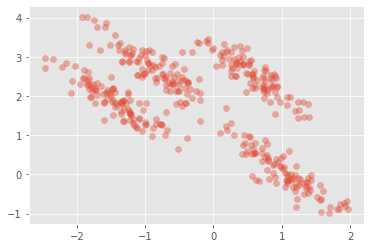

In [16]:
# Importamos librerías
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
from sklearn.datasets.samples_generator import make_blobs
# Creamos un dataset sintético de cuatro clusters no circulares
X, _ = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
rng = np.random.RandomState(13)
X=np.dot(X, rng.randn(2, 2))

plt.scatter(X[:,0],X[:,1],alpha=0.4)

Ahora, comparemos los resultados de K-means y GMM:

In [20]:
# Se ejecutan los algoritmos: kmeans y GMM con 4 clusters
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
model1=KMeans(n_clusters=4, random_state=42)
model1.fit(X)
model2=GaussianMixture(n_components=4, covariance_type='full', random_state=42)
model2.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Text(0.5, 1.0, 'GMM')

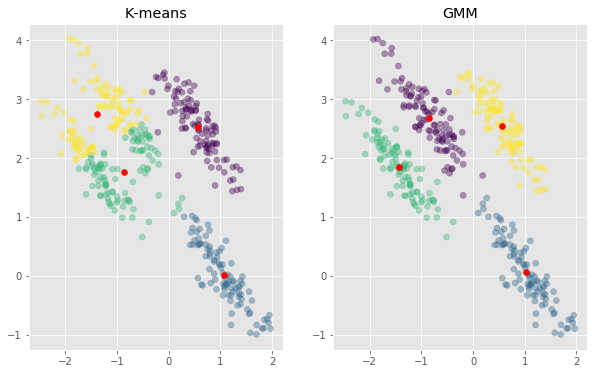

In [21]:
# Se dibujan los clusters obtenidos por cada uno de los métodos. Se observa que K-means
# tuvo problemas en la agrupación dado la forma de los clusters.
plt.figure(figsize=(10,6))
pred1=model1.predict(X)
pred2=model2.predict(X)

plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c=pred1,alpha=0.4)
plt.scatter(model1.cluster_centers_[:,0],model1.cluster_centers_[:,1],c="r")
plt.title("K-means")

plt.subplot(122)
plt.scatter(X[:,0],X[:,1],c=pred2,alpha=0.4)
plt.scatter(model2.means_[:,0],model2.means_[:,1],c="r")
plt.title("GMM")

Adicionalmente, como en GMM cada punto puede pertenencer a más de un cluster, podemos obtener una representación probabilística de cada punto a cada uno de los clusters:

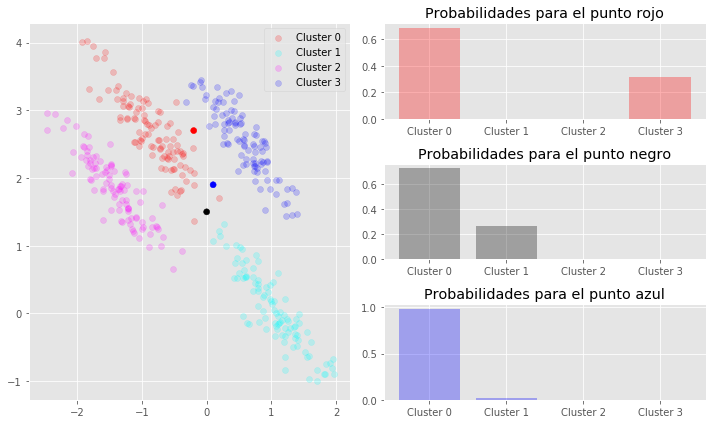

In [41]:
# En este ejmplo se visualizará la representación probabilística de tres puntos seleccionados: 
# punto rojo, punto negro y punto azul (en la gráfica1). Se escogen estos puntos que se 
# encuentran en la frontera con el fin de que pertenezcan a más de un cluster.

plt.figure(figsize=(10,6))
point=np.array([[-0.2,2.7],
                [0,1.5],
                [0.1, 1.9],
            ])
probs=model2.predict_proba(point)

plt.subplot(121)
plt.scatter(X[pred2 == 0,0],X[pred2 == 0,1],c='red',alpha=0.2)
plt.scatter(X[pred2 == 1,0],X[pred2 == 1,1],c='cyan',alpha=0.2)
plt.scatter(X[pred2 == 2,0],X[pred2 == 2,1],c='magenta',alpha=0.2)
plt.scatter(X[pred2 == 3,0],X[pred2 == 3,1],c='blue',alpha=0.2)

plt.scatter(point[:,0],point[:,1],c=["r","k","b"])
plt.legend([
    'Cluster 0',
    'Cluster 1',
    'Cluster 2',
    'Cluster 3',
])

plt.subplot(322)
plt.bar(["Cluster {}".format(i) for i in range(4)],probs[0].flatten(), color="r", alpha=0.3)
plt.title("Probabilidades para el punto rojo")

plt.subplot(324)
plt.bar(["Cluster {}".format(i) for i in range(4)],probs[1].flatten(), color="k", alpha=0.3)
plt.title("Probabilidades para el punto negro")

plt.subplot(326)
plt.bar(["Cluster {}".format(i) for i in range(4)],probs[2].flatten(), color="b", alpha=0.3)
plt.title("Probabilidades para el punto azul")
plt.tight_layout()

**Ejercicio**: ¿Cuáles serían las probabilidades para el punto (-1.5,1.5)?

**Ejercicio**

Repita el procedimiento que realizamos la sesión anterior para representar los resumenes de películas de TMBD, utilice GMM y contraste con los resultados de K-means (utilice 20 clusters)

## Análisis de Semántica Latente - Latent Semantic Analysis

Cada uno de los documentos se compone de varios tópicos y no sólo uno, tal y como se muestra en la siguiente figura:

![topic_model](https://i1.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot_3.png?resize=391%2C337&ssl=1)

Latent Semantic Analysis (LSA) es uno de los módelos de tópicos más básicos que está basado en descomposición en **valores propios**. LSA busca estimar el contexto en cada uno de los documentos al capturar unos conceptos ocultos conocidos como tópicos. Veamos los pasos que utiliza LSA:

1. Generar una representación TF-IDF con todos los documentos del corpus (esta representación es una matríz $\mathbf{A} \in \mathbb{R}^{m\times n}$ ).

    ![tf-idf](https://i0.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot_4.png?resize=555%2C224&ssl=1)

2. Realizar la descomposición en valores propios (usando SVD - Singular Value Descomposition), la matríz $\mathbf{A}$ se descompone en una matríz $\mathbf{U}\in \mathbb{R}^{m\times k}$ (matríz documento-tópico), una matríz $\mathbf{S}\in \mathbb{R}^{k\times k}$ (matríz con los valores propios) y una matríz $\mathbf{V}\in \mathbb{R}^{k\times n}$ (matríz término tópico).

    ![svd_lda](https://i1.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot_7.png?resize=700%2C254&ssl=1)

3. El principal enfoque de LSA es seleccionar los $k$ valores propios más representativos en la descomposición, tal y como se mostró en la figura anterior.

Veamos un ejemplo de LSA, en este caso utilizaremos el dataset 20 NewsGroups de sklearn, el cual contiene un corpus de 11313 noticias en 20 distintos grupos.

In [42]:
# Cargamos el dataset 20 Newsgroup de sklearn
from sklearn.datasets import fetch_20newsgroups
dataset=fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
corpus=dataset.data
labels=dataset.target_names

In [0]:
# Mostramos 5 ejemplos de documentos en el corpus
corpus[:5]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [43]:
# Mostramos las posibles categorias
np.unique(labels)

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype='<U24')

Ahora preprocesaremos los documentos al eliminar caracteres especiales, stopwords y mayúsculas.

In [44]:
import nltk, re
nltk.download("stopwords")
def preprocessing(doc):
    wpt=nltk.WordPunctTokenizer()
    stop_words=nltk.corpus.stopwords.words('english')
    # Se eliminan caracteres especiales
    doc=re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    # Se convierten los téxtos a minúsculas
    doc=doc.lower()
    doc.strip("\n")
    # Se separan signos de puntuación
    tokens=wpt.tokenize(doc)
    # Se eliminan las stopwords
    tokens=[token for token in tokens if token not in stop_words and len(token)>2]
    # Retornamos una versión filtrada del texto
    return ' '.join(tokens)
norm_corpus=list(map(preprocessing,corpus))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juan.gama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
norm_corpus[:5]

['well sure story nad seem biased disagree statement media ruin israels reputation rediculous media proisraeli media world lived europe realize incidences one described letter occured media whole seem try ignore subsidizing israels existance europeans least degree think might reason report clearly atrocities shame austria daily reports inhuman acts commited israeli soldiers blessing received government makes holocaust guilt away look jews treating races got power unfortunate',
 'yeah expect people read faq etc actually accept hard atheism need little leap faith jimmy logic runs steam jim sorry cant pity jim sorry feelings denial faith need get well pretend end happily ever anyway maybe start new newsgroup altatheisthard wont bummin much byebye big jim dont forget flintstones chewables bake timmons iii',
 'although realize principle one strongest points would still like know ask question sort arab countries want continue think tank charade fixation israel must stop might start asking so

Ahora, construiremos una representación TF-IDF para aplicar LSA.

In [45]:
# Lo limitamos a un vocabulario de tamaño 1000
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words="english", max_features=1000, max_df=0.5, sublinear_tf=True)
tfidf.fit(norm_corpus)
X_tfidf=tfidf.transform(norm_corpus).toarray()
print("La representación TF-IDF es de tamaño: {}".format(X_tfidf.shape))

La representación TF-IDF es de tamaño: (11314, 1000)


El siguiente paso es descomponer esta matríz utilizando SVD, en este caso obtendremos una representación con 20 tópicos:

In [46]:
from sklearn.decomposition import TruncatedSVD
fsvd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=0)
svd_model.fit(X_tfidf)

TruncatedSVD(algorithm='randomized', n_components=20, n_iter=100,
             random_state=0, tol=0.0)

Podemos acceder a los componentes encontrados con SVD:

In [58]:
svd_model.components_.shape

(20, 1000)

Estos componentes son los tópicos (los cuales se componen de combinaciones de palabras), veamos un ejemplo de los términos importantes en cada uno de los tópicos.

In [48]:
# lista de términos del vocabulaario
terms=tfidf.get_feature_names()
for i, comp in enumerate(svd_model.components_):
    # Juntamos los términos con cada uno de los valores en la matriz V
    terms_comp=zip(terms, comp)
    # Ordenamos los términos de acuerdo al resultado de LSA
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
    # Mostramos los términos más importantes en cada tópico
    print("Tópico {}: {}".format(i," ".join(list(map(lambda x:x[0], sorted_terms)))))

Tópico 0: like dont know think people good use time new make way thanks want say right
Tópico 1: thanks windows email card use advance drive file software dos program help using files looking
Tópico 2: game team year games good season players play hockey like teams got win league car
Tópico 3: thanks know email advance god dont looking anybody post jesus info like appreciated address believe
Tópico 4: email new information thanks sale address interested send list university year years government mail contact
Tópico 5: drive god sale card new hard scsi offer drives condition price jesus controller disk shipping
Tópico 6: god windows game team file jesus games dos win files problem bible believe season year
Tópico 7: like car new good sounds looks window bike sale look windows ive condition god file
Tópico 8: dont think email sale god use offer games game interested send team shipping best key
Tópico 9: use thanks good key chip god ive way encryption clipper like data keys advance drive


También podemos obtener una representación de cada documento como una composición de los tópicos. ¿Qué podemos concluír?

In [50]:
from sklearn.manifold import TSNE
# Obtenemos la representación de cada documento
X_topics=svd_model.transform(X_tfidf)
# Utilizamos TSNE para visualizar el espacio de los tópicos
tsne=TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=2, verbose=1)
T=tsne.fit_transform(X_topics)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 11314 samples in 0.019s...
[t-SNE] Computed neighbors for 11314 samples in 3.583s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11314
[t-SNE] Computed conditional probabilities for sample 2000 / 11314
[t-SNE] Computed conditional probabilities for sample 3000 / 11314
[t-SNE] Computed conditional probabilities for sample 4000 / 11314
[t-SNE] Computed conditional probabilities for sample 5000 / 11314
[t-SNE] Computed conditional probabilities for sample 6000 / 11314
[t-SNE] Computed conditional probabilities for sample 7000 / 11314
[t-SNE] Computed conditional probabilities for sample 8000 / 11314
[t-SNE] Computed conditional probabilities for sample 9000 / 11314
[t-SNE] Computed conditional probabilities for sample 10000 / 11314
[t-SNE] Computed conditional probabilities for sample 11000 / 11314
[t-SNE] Computed conditional probabilities for sample 11314 / 11314
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence 

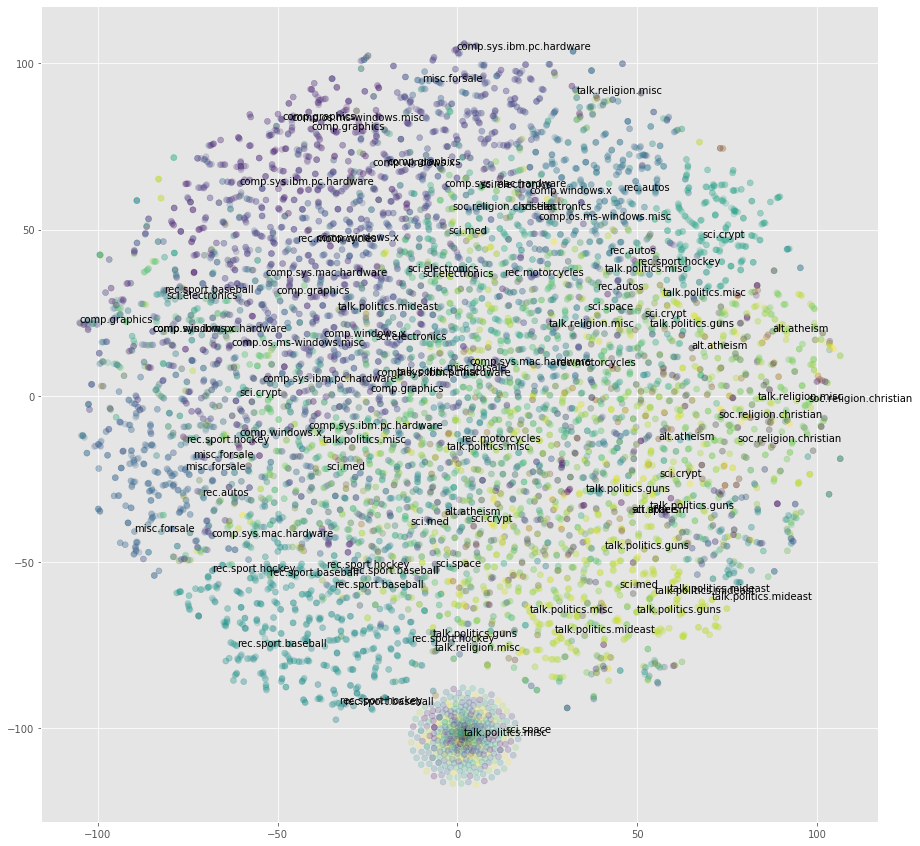

In [51]:
idx=np.arange(len(corpus))
plt.figure(figsize=(15, 15))
n_docs=100
idx=np.arange(len(corpus))
valid_idx=np.random.choice(idx, replace=False, size=n_docs)
plt.scatter(T[:, 0], T[:, 1], c=dataset.target, alpha=0.2)
viz_titles=[labels[dataset.target[i]] for i in valid_idx]
for label, x, y in zip(viz_titles, T[valid_idx, 0], T[valid_idx, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

## Latent Dirichlet allocation

LDA es un modelo probabilístico generativo, que asume que cada tópico es una mezcla de un conjunto de palabras y que cada documento es una mezcla de un conjunto de distribuciones de tópicos.

En general, el modelo utiliza un número $M$ de documentos, un número $N$ de palabras y un número $K$ de tópicos para generar: una distribución $\psi$ de palabras para cada tópico $K$ y una distribución $\phi$ de tópicos para cada documento.

$\psi_{nk}$  = $P(n|k)$

$\phi_{km}$  = $P(k|m)$


![lda_process](https://miro.medium.com/max/2596/1*2g0ARjCpTodoOwSso9XbLg.png)



En LDA, se asumen distribuciones multinomiales, así mismo, desde un enfoque Bayesiano, se utilizan distribuciones apriori Dirichlet (la cual es el conjugado de la distribución multinomial). Para no entrar tanto en detalle, desde el punto de vista de la aplicación tenemos los dos siguientes parámetros:

* $\alpha$, el cual es un parámetro de la distribución Dirichlet que representa la densidad documento-tópico. Entre más grande sea el valor de $\alpha$, los documentos estarán conformados de más tópicos.

* $\beta$, el cual es el parametro apriori que representa la densidad tópico-término. Con un valor grande de $\beta$ los tópicos se conforman de un mayor número de palabras.


![tm](https://raw.githubusercontent.com/larajuse/share/master/TopicModeling.png)


Veamos un ejemplo de la aplicación de LDA:

In [59]:
#En LDA utilizaremos una representación de bolsa de palabras (sigue una distribución multinomial)
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer(max_features=1000, max_df=0.5)
bow.fit(norm_corpus)
X_bow=bow.transform(norm_corpus).toarray()

In [60]:
# Ahora entrenaremos un modelo LDA
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda=LDA(n_components=20, n_jobs=-1)
lda.fit(X_bow)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [61]:
# Veamos los términos más representativos encontrados con LDA
terms=bow.get_feature_names()
for i, comp in enumerate(lda.components_):
    # Juntamos los términos con cada uno de los valores en la matríz V
    terms_comp=zip(terms, comp)
    # Ordenamos los términos de acuerdo al resultado de LSA
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    # Mostramos los términos más importantes en cada tópico
    print("Tópico {}: {}".format(i," ".join(list(map(lambda x:x[0], sorted_terms)))))

Tópico 0: government people would gun law state israel rights right states
Tópico 1: file window output program entry use widget motif code set
Tópico 2: space research university new april center national nasa health launch
Tópico 3: windows dos problem using use program files thanks help running
Tópico 4: card speed drive video mhz monitor board ram one computer
Tópico 5: book new article books good condition dod excellent original offer
Tópico 6: drive scsi disk drives data hard controller bit system use
Tópico 7: key chip one system use bit keys clipper would encryption
Tópico 8: image available software graphics data version ftp also images color
Tópico 9: president going stephanopoulos think know would said jobs tax fbi
Tópico 10: one said people went time know would day told could
Tópico 11: one people think dont like would get know even good
Tópico 12: game team year games play season last first players hockey
Tópico 13: edu com mail list internet information send anonymous faq

¿Qué diferencia encontramos al contrastar con el ejemplo de LSA?

Veamos la representación de los documentos y una visualización con t-SNE

In [62]:
from sklearn.manifold import TSNE
# Obtenemos la representación de cada documento
X_topics=lda.transform(X_bow)
# Utilizamos TSNE para visualizar el espacio de los tópicos
tsne=TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=2, verbose=1)
T=tsne.fit_transform(X_topics)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 11314 samples in 0.014s...
[t-SNE] Computed neighbors for 11314 samples in 2.625s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11314
[t-SNE] Computed conditional probabilities for sample 2000 / 11314
[t-SNE] Computed conditional probabilities for sample 3000 / 11314
[t-SNE] Computed conditional probabilities for sample 4000 / 11314
[t-SNE] Computed conditional probabilities for sample 5000 / 11314
[t-SNE] Computed conditional probabilities for sample 6000 / 11314
[t-SNE] Computed conditional probabilities for sample 7000 / 11314
[t-SNE] Computed conditional probabilities for sample 8000 / 11314
[t-SNE] Computed conditional probabilities for sample 9000 / 11314
[t-SNE] Computed conditional probabilities for sample 10000 / 11314
[t-SNE] Computed conditional probabilities for sample 11000 / 11314
[t-SNE] Computed conditional probabilities for sample 11314 / 11314
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence 

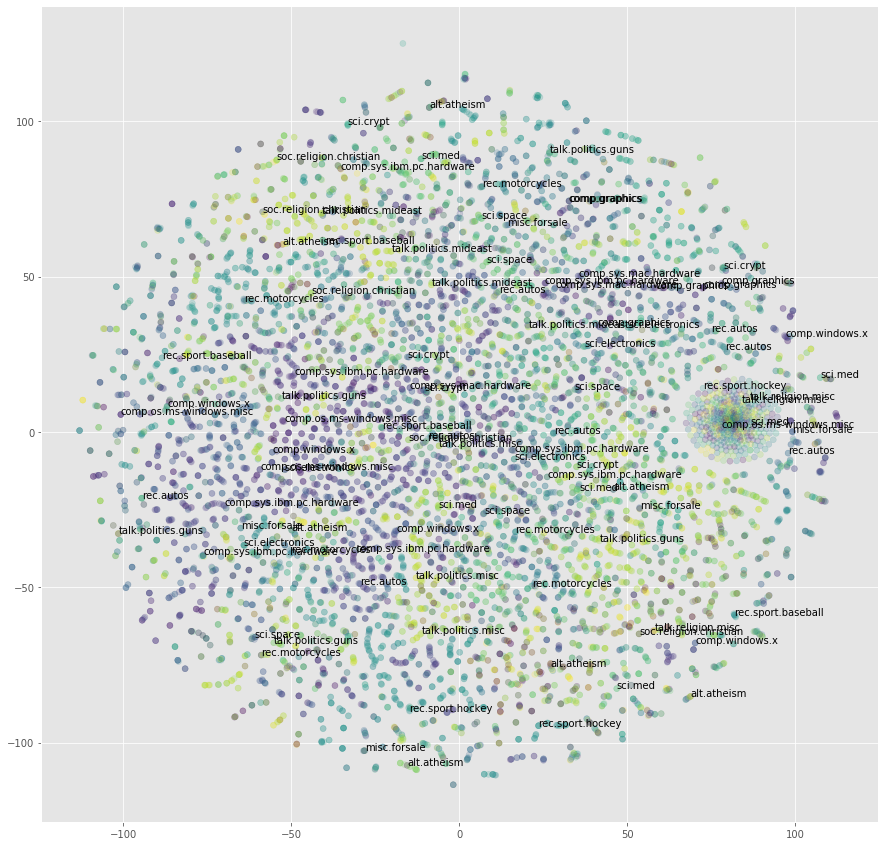

In [63]:
idx=np.arange(len(corpus))
plt.figure(figsize=(15, 15))
n_docs=100
idx=np.arange(len(corpus))
valid_idx=np.random.choice(idx, replace=False, size=n_docs)
plt.scatter(T[:, 0], T[:, 1], c=dataset.target, alpha=0.2)
viz_titles=[labels[dataset.target[i]] for i in valid_idx]
for label, x, y in zip(viz_titles, T[valid_idx, 0], T[valid_idx, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

Una herramienta de gran útilidad para visualizar y ajustar los parámetros de LDA es pyLDAvis, veamos un ejemplo:

In [66]:
from pyLDAvis import sklearn as sklearn_lda
import pickle, pyLDAvis, os
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(20))

/Users/juan.gama/.vscode/extensions/ms-python.python-2020.5.86806/pythonFiles/lib/python/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """


In [67]:
X_bow=bow.transform(norm_corpus)
LDAvis_prepared = sklearn_lda.prepare(lda, X_bow, bow)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

In [68]:
with open(LDAvis_data_filepath,"rb") as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(20) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11    -0.139915 -0.093336       1        1  9.549078
17    -0.132280 -0.080753       2        1  9.314502
16    -0.102528 -0.074552       3        1  9.247390
10    -0.131815 -0.132757       4        1  7.255196
0     -0.095689 -0.078720       5        1  6.619713
18    -0.068804  0.010908       6        1  6.152143
2      0.048745  0.073818       7        1  5.406112
12    -0.079270 -0.107073       8        1  4.831569
1      0.074610  0.166177       9        1  4.721383
8      0.106489  0.217487      10        1  4.225940
3     -0.009547  0.093577      11        1  4.107983
7     -0.056606  0.044210      12        1  4.062299
13     0.171309  0.189464      13        1  3.391876
4     -0.005199  0.064710      14        1  3.279262
9     -0.101538 -0.091706      15        1  3.255246
15    -0.051161 -0.081011      16        1  3.110338
5     -0.013228  0.029376      17        1  3.031708
14    -0.001179  0.012039      18        1  2.956671
6      0.089429  0.157692      19        1  2.877081
19     0.498178 -0.319546      20        1  2.604510, topic_info=           Term         Freq        Total Category  logprob  loglift
545         max  4702.000000  4702.000000  Default  30.0000  30.0000
358         g9v  1165.000000  1165.000000  Default  29.0000  29.0000
91          b8f  1149.000000  1149.000000  Default  28.0000  28.0000
375         god  1738.000000  1738.000000  Default  27.0000  27.0000
11          a86   947.000000   947.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
952       watch     0.051673   196.061119  Topic20 -12.4845  -4.5933
656  pittsburgh     0.051673   197.079070  Topic20 -12.4845  -4.5985
436  individual     0.051673   262.896324  Topic20 -12.4845  -4.8867
981      worked     0.051673   205.467406  Topic20 -12.4845  -4.6402
638       parts     0.051673   327.427525  Topic20 -12.4845  -5.1062

[937 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         4  0.038805    000
0         7  0.814906    000
0        13  0.007761    000
0        15  0.062088    000
0        16  0.073730    000
...     ...       ...    ...
999      12  0.017181  youre
999      14  0.022335  youre
999      15  0.005154  youre
999      17  0.005154  youre
999      18  0.018899  youre

[6463 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 18, 17, 11, 1, 19, 3, 13, 2, 9, 4, 8, 14, 5, 10, 16, 6, 15, 7, 20])

## Referencias

* https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0* https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/
* https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html